In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Netflix.data import Movies

In [34]:
# Chris dataset
df = pd.read_csv('/Users/renatoboemer/code/boemer00/Netflix/raw_data/merged_movies_by_index.csv')

In [ ]:
# data split

## Data Wrangling

In [36]:
df.shape  # (10386, 34)

(10386, 34)

In [42]:
df.sample(1)

,avg_review_score,n_reviews,year,title,Title,Year,Rated,Released,Runtime,Genre,...,Response,Internet Movie Database,Index_match,DVD,BoxOffice,Production,Website,Rotten Tomatoes,Metacritic,Ratings
8060,3.597931,4059,1988,The Vanishing,The Vanishing,1988,Not Rated,27 Oct 1988,107 min,"Mystery, Thriller",...,True,7.7/10,13825,25 Mar 2017,NaN,Argos Films,NaN,98%,NaN,NaN


In [38]:
df.columns

Index(['avg_review_score', 'n_reviews', 'year', 'title', 'Title', 'Year',
       'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors',
       'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Metascore',
       'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'totalSeasons', 'Response',
       'Internet Movie Database', 'Index_match', 'DVD', 'BoxOffice',
       'Production', 'Website', 'Rotten Tomatoes', 'Metacritic', 'Ratings'],
      dtype='object')

In [43]:
df.drop(columns=['title', 'year', 'Awards', 'Poster', 'Metascore', 'Internet Movie Database',
                 'totalSeasons', 'Response','Index_match', 'DVD', 'BoxOffice', 'imdbVotes',
                 'Production', 'Website', 'Metacritic', 'Ratings'], inplace=True)

In [75]:
df['Runtime'] = df['Runtime'].fillna(0)

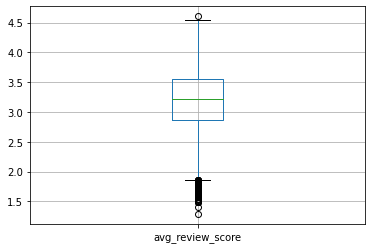

In [45]:
df[['avg_review_score']].boxplot();

## Trainer Function

In [46]:
def data_wrangling(self):
    """ cleaning irrelevant rows and columns """ 
    
    df = self.drop(columns=['title', 'year', 'Awards', 'Poster', 'Metascore','totalSeasons', 'imdbVotes',
                          'Response','Index_match', 'DVD', 'BoxOffice','Production', 'Internet Movie Database',
                          'Website', 'Metacritic', 'Ratings'], inplace=True)
    
    ## fill nan and' min', convert to int and replace zero for the mean
    df['Runtime'] = df['Runtime'].fillna(0)
    df['Runtime'] = df['Runtime'].apply(lambda x: int(str(x).replace(' min', '')))
    df['Runtime'] = df['Runtime'].replace(0, df['Runtime'].mean())
    
    ## fill nan and remove '%', convert to float and replace zero for the mean
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna(0) 
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x: float(str(x).replace('%', '')))
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].replace(0, df['Rotten Tomatoes'].mean())
    
    ## replace countries with most frequent
    freq_country = df[['Country']].value_counts().reset_index()['Country'][0]
    df['Country'] = df['Country'].replace(0, freq_country).replace('United States', freq_country)

    return df
    
def data_scaling(self):
    pass

SyntaxError: invalid syntax (<ipython-input-46-c084d2ba4136>, line 17)